**_<div style="text-align: center"> - - -   Ahmed Gurbuz | SMU Data Science Bootcamp   - - -</div>_**

# WeatherPy
----

#### This Python script visualizes the weather of randomly selected 500+ cities across the world of varying distance from the equator and builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint

# Import API key
from config import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).



In [3]:
# Create a settings dictionary with your API key and preferred unit
params = {"units": "imperial", "appid": openweatherkey}

# Define base url derived from Open Weather API docs
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a for loop to see if query url built upon the base url works or not 
# Check first 10 cities API response objects
counter = 0
for city in cities:
    params['q'] = city
    if counter == 5:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [4]:
#Create Data Frame for the features we will be analyzing for each city
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
#Create counters for the loop
record_count = 1

#Create loop
#Gathering information from Openweather API for each city
for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        record_count = 1

    # Giving a break while fetching data not to exceed API (Open Weather API restricts 60 calls per minute for free accounts)
        time.sleep(50)
    
    # Create try/except condition to catch and see that city information can be found or not from API call
    try:
        print(f"Processing Record {record_count} | {city}")
        
        # Create get request to achieve response object and convert it into JSON
        response = requests.get(base_url, params = params).json()
        
        # Filling Data Frame with information fetched from API (API docs)
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
    
    # Print 'City not found' if the API request gets no response
    except:
        print(f"City not found. Skipping...") 
    record_count += 1

# Print out when data retrieval completed                 
print("Data retrieval finished")

Processing Record 1 | atuona
Processing Record 2 | port alfred
Processing Record 3 | ushuaia
Processing Record 4 | khatanga
Processing Record 5 | hobart
Processing Record 6 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 | busselton
Processing Record 8 | maun
Processing Record 9 | joura
Processing Record 10 | rikitea
Processing Record 11 | mar del plata
Processing Record 12 | abeche
Processing Record 13 | bluff
Processing Record 14 | ayan
Processing Record 15 | new norfolk
Processing Record 16 | queimadas
Processing Record 17 | rzhaksa
Processing Record 18 | pedasi
Processing Record 19 | georgetown
Processing Record 20 | poum
Processing Record 21 | codrington
Processing Record 22 | hilo
Processing Record 23 | sokolo
Processing Record 24 | lebu
Processing Record 25 | bilibino
Processing Record 26 | nikolskoye
Processing Record 27 | pandan
Processing Record 28 | kombissiri
Processing Record 29 | punta arenas
Processing Record 30 | marcona
City not found. Skipping...
Pr

Processing Record 58 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 59 | geraldton
Processing Record 60 | sibu
Processing Record 1 | chara
Processing Record 2 | amot
Processing Record 3 | asau
City not found. Skipping...
Processing Record 4 | mehamn
Processing Record 5 | pasir gudang
Processing Record 6 | bonfim
Processing Record 7 | katha
City not found. Skipping...
Processing Record 8 | lazaro cardenas
Processing Record 9 | xuanhua
Processing Record 10 | port augusta
Processing Record 11 | taoudenni
Processing Record 12 | mayo
Processing Record 13 | kalangala
Processing Record 14 | shimabara
Processing Record 15 | klaksvik
Processing Record 16 | san quintin
Processing Record 17 | broken hill
Processing Record 18 | dwarka
Processing Record 19 | meiktila
Processing Record 20 | guerrero negro
Processing Record 21 | solone
Processing Record 22 | balkhash
Processing Record 23 | guapi
Processing Record 24 | nacala
Processing Record 25 | la libertad
Processing Record 26 |

Processing Record 54 | russell
Processing Record 55 | davila
Processing Record 56 | taltal
Processing Record 57 | ahipara
Processing Record 58 | turukhansk
Processing Record 59 | carastelec
Processing Record 60 | axim
Processing Record 1 | belle fourche
Processing Record 2 | burica
City not found. Skipping...
Processing Record 3 | nkayi
Processing Record 4 | inuvik
Processing Record 5 | iqaluit
Processing Record 6 | tiszaroff
Processing Record 7 | laguna
Processing Record 8 | kudahuvadhoo
Processing Record 9 | fare
Processing Record 10 | sibolga
Processing Record 11 | tamara
Processing Record 12 | warqla
City not found. Skipping...
Processing Record 13 | petrozavodsk
Processing Record 14 | sao jose da coroa grande
Processing Record 15 | bac lieu
City not found. Skipping...
Processing Record 16 | saurimo
Processing Record 17 | tharad
Processing Record 18 | sancti spiritus
Processing Record 19 | bani walid
Processing Record 20 | belawan
Processing Record 21 | acapulco
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a csv file
data_csv = data_df.to_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv", index = None, header=True)

In [7]:
# Display the Data Frame
data_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,27,PF,1569954669,76,-9.8,-139.03,79.43,13.13
1,port alfred,35,ZA,1569954670,84,-33.59,26.89,62.01,4
2,ushuaia,75,AR,1569954670,80,-54.81,-68.31,41,23.04
3,khatanga,3,RU,1569954670,90,71.98,102.47,19.67,0.74
4,hobart,100,AU,1569954670,86,-42.88,147.33,42.01,8.05
5,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,busselton,5,AU,1569954676,67,-33.64,115.35,45,2.01
7,maun,0,BW,1569954677,11,-19.99,23.42,75.2,4.7
8,joura,75,IN,1569954677,100,26.34,77.81,75.2,3.36
9,rikitea,88,PF,1569954677,83,-23.12,-134.97,67.91,18.32


In [8]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)

# Converting unix date format into readable version
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Display cleaned Data Frame
data_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,27,PF,2019-10-01 18:31:09,76,-9.8,-139.03,79.43,13.13
1,port alfred,35,ZA,2019-10-01 18:31:10,84,-33.59,26.89,62.01,4
2,ushuaia,75,AR,2019-10-01 18:31:10,80,-54.81,-68.31,41,23.04
3,khatanga,3,RU,2019-10-01 18:31:10,90,71.98,102.47,19.67,0.74
4,hobart,100,AU,2019-10-01 18:31:10,86,-42.88,147.33,42.01,8.05
6,busselton,5,AU,2019-10-01 18:31:16,67,-33.64,115.35,45,2.01
7,maun,0,BW,2019-10-01 18:31:17,11,-19.99,23.42,75.2,4.7
8,joura,75,IN,2019-10-01 18:31:17,100,26.34,77.81,75.2,3.36
9,rikitea,88,PF,2019-10-01 18:31:17,83,-23.12,-134.97,67.91,18.32
10,mar del plata,33,AR,2019-10-01 18:31:17,22,-46.43,-67.52,48.47,11.14


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

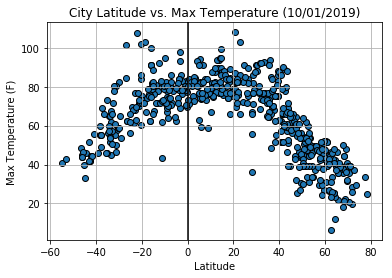

In [13]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Max Temperature (10/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_max_temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

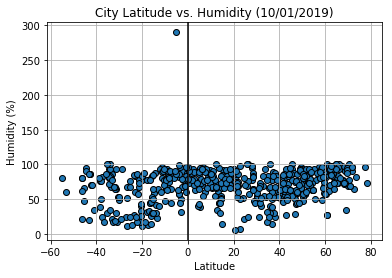

In [14]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Humidity (10/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

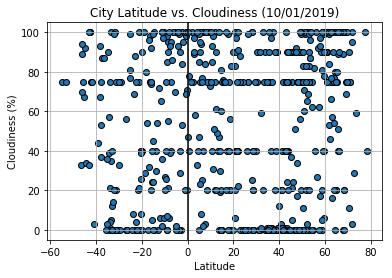

In [15]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Cloudiness (10/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

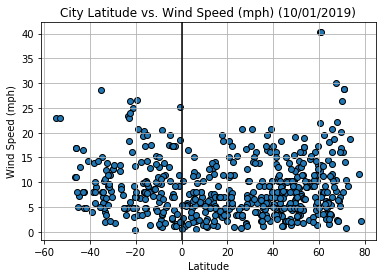

In [18]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Wind Speed (mph) (10/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_windspeed.png")

# Show the Figure
plt.show()

#### Latitude vs. Longtitude

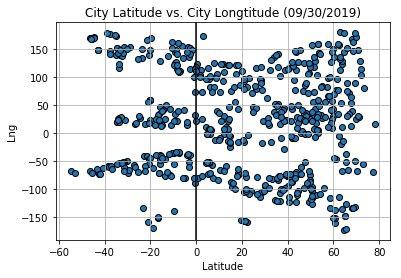

In [19]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Lng"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. City Longtitude (09/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Lng")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_lon.png")

# Show the Figure
plt.show()